## Notebook showcasing the various options in Roodmus for analysis and visualisations
In this notebook, the user can load metadata from one or several jobs from a processing pipeline done in RELION or cryoSPARC. This metadata, along with the ground-truth particle parameters are loaded into data frames, which allow for easy and conveniet plotting. We also provide several convenient functions to make plots.


In [2]:
### imports
# general
import numpy as np
import pandas as pd

# roodmus
from importlib import reload
import roodmus.analysis.utils
reload(roodmus.analysis.utils)
from roodmus.analysis.utils import load_data
from roodmus.analysis.plot_ctf import plot_CTF, plot_defocus_scatter
from roodmus.analysis.plot_picking import (
    label_micrograph_picked, 
    label_micrograph_truth,
    label_micrograph_truth_and_picked, 
    plot_precision, plot_recall, 
    plot_boundary_investigation,
    plot_overlap_investigation, 
    plot_precision_and_recall, 
    plot_f1_score
)
from roodmus.analysis.plot_frames import plot_frame_distribution
from roodmus.analysis.plot_classes import plot_2Dclass_precision, plot_2Dclasses_frames
from roodmus.analysis.plot_alignment import plot_picked_pose_distribution, plot_true_pose_distribution


In [ ]:
### data loading
### steered MD data set for the Covid-19 spike protein (PDB id: 6xm5)
config_dir = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_2/mrc/"
meta_files = [
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J508_picked_particles.cs",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J511_050_particles.cs",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J513_passthrough_particles_selected.cs",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J515_topaz_picked_particles.cs",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J518_050_particles.cs",
    ["data/6xm5_steered_Roodmus_2/cryoSPARC/J519_class_00_final_particles.cs",
         "data/6xm5_steered_Roodmus_2/cryoSPARC/J519_passthrough_particles_class_0.cs"],
    ["data/6xm5_steered_Roodmus_2/cryoSPARC/J519_class_01_final_particles.cs",
        "data/6xm5_steered_Roodmus_2/cryoSPARC/J519_passthrough_particles_class_1.cs"],
    ["data/6xm5_steered_Roodmus_2/cryoSPARC/J519_class_02_final_particles.cs",
        "data/6xm5_steered_Roodmus_2/cryoSPARC/J519_passthrough_particles_class_2.cs"],
    ["data/6xm5_steered_Roodmus_2/cryoSPARC/J519_class_03_final_particles.cs",
        "data/6xm5_steered_Roodmus_2/cryoSPARC/J519_passthrough_particles_class_3.cs"],
    ["data/6xm5_steered_Roodmus_2/cryoSPARC/J520_003_particles.cs",
        "data/6xm5_steered_Roodmus_2/cryoSPARC/J520_passthrough_particles.cs"],
    ["data/6xm5_steered_Roodmus_2/cryoSPARC/J521_004_particles.cs",
        "data/6xm5_steered_Roodmus_2/cryoSPARC/J521_passthrough_particles.cs"],
    ["data/6xm5_steered_Roodmus_2/cryoSPARC/J523_005_particles.cs",
        "data/6xm5_steered_Roodmus_2/cryoSPARC/J523_passthrough_particles.cs"],
    # "data/6xm5_steered_Roodmus_2/cryoSPARC/J529_050_particles.cs",
    # "data/6xm5_steered_Roodmus_2/cryoSPARC/J526_passthrough_particles.cs",
]

jobtypes = {
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J508_picked_particles.cs": "blob picker",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J511_050_particles.cs": "2D classification",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J513_passthrough_particles_selected.cs": "2D class selection",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J515_topaz_picked_particles.cs": "topaz picking",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J518_050_particles.cs": "2D classification 2",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J519_class_00_final_particles.cs": "3D class 0",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J519_class_01_final_particles.cs": "3D class 1",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J519_class_02_final_particles.cs": "3D class 2",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J519_class_03_final_particles.cs": "3D class 3",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J520_003_particles.cs": "Refined class 0",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J521_004_particles.cs": "Refined class 1",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J523_005_particles.cs": "Homogeneous refinement",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J529_050_particles.cs": "2D classification class 0",
    "data/6xm5_steered_Roodmus_2/cryoSPARC/J526_passthrough_particles.cs": "Flexible refinement",
}

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
progressbar = True

for i, meta_file in enumerate(meta_files):
    if i == 0:
        analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, progressbar=progressbar, ignore_missing_files=ignore_missing_files) # creates the class
    else:
        analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file


In [4]:
### data loading
### steered MD data set for Sobhan (collected with single defocus value)
config_dir = "/home/mjoosten1/projects/roodmus/data/20230531_Sobhan_simulated/mrc/"
meta_files = [
    "data/20230531_Sobhan_simulated/cryoSPARC/picked_particles.cs",
    "data/20230531_Sobhan_simulated/cryoSPARC/J584_050_particles.cs",
    "data/20230531_Sobhan_simulated/cryoSPARC/particles_selected.cs",
    ["data/20230531_Sobhan_simulated/cryoSPARC/J586_class_00_final_particles.cs",
        "data/20230531_Sobhan_simulated/cryoSPARC/J586_passthrough_particles_class_0.cs"],
    ["data/20230531_Sobhan_simulated/cryoSPARC/J586_class_01_final_particles.cs",
        "data/20230531_Sobhan_simulated/cryoSPARC/J586_passthrough_particles_class_1.cs"],
    ["data/20230531_Sobhan_simulated/cryoSPARC/J586_class_02_final_particles.cs",
        "data/20230531_Sobhan_simulated/cryoSPARC/J586_passthrough_particles_class_2.cs"],
    ["data/20230531_Sobhan_simulated/cryoSPARC/J586_class_03_final_particles.cs",
        "data/20230531_Sobhan_simulated/cryoSPARC/J586_passthrough_particles_class_3.cs"],
]

jobtypes = {
    "data/20230531_Sobhan_simulated/cryoSPARC/picked_particles.cs": "blob picker",
    "data/20230531_Sobhan_simulated/cryoSPARC/J584_050_particles.cs": "2D classification",
    "data/20230531_Sobhan_simulated/cryoSPARC/particles_selected.cs": "2D class selection",
    "data/20230531_Sobhan_simulated/cryoSPARC/J586_class_00_final_particles.cs": "3D class 0",
    "data/20230531_Sobhan_simulated/cryoSPARC/J586_class_01_final_particles.cs": "3D class 1",
    "data/20230531_Sobhan_simulated/cryoSPARC/J586_class_02_final_particles.cs": "3D class 2",
    "data/20230531_Sobhan_simulated/cryoSPARC/J586_class_03_final_particles.cs": "3D class 3",
}

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
progressbar = True

for i, meta_file in enumerate(meta_files):
    if i == 0:
        analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, progressbar=progressbar, ignore_missing_files=ignore_missing_files) # creates the class
    else:
        analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file


debug
loading metadata from data/20230531_Sobhan_simulated/cryoSPARC/picked_particles.cs...
loaded metadata from data/20230531_Sobhan_simulated/cryoSPARC/picked_particles.cs. determined file type: cs


Dictionaries now contain 1189963 particles and 0 true particles
added 1189963 particles from data/20230531_Sobhan_simulated/cryoSPARC/picked_particles.cs


loading micrographs: 100%|██████████| 1047/1047 [08:34<00:00,  2.04it/s, micrograph=001046.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 1189963 particles and 261750 true particles
Added 261750 particles from /home/mjoosten1/projects/roodmus/data/20230531_Sobhan_simulated/mrc/
debug
loading metadata from data/20230531_Sobhan_simulated/cryoSPARC/J584_050_particles.cs...
loaded metadata from data/20230531_Sobhan_simulated/cryoSPARC/J584_050_particles.cs. determined file type: cs
checking if ugraphs exist...


Dictionaries now contain 1517781 particles and 261750 true particles
added 327818 particles from data/20230531_Sobhan_simulated/cryoSPARC/J584_050_particles.cs
debug
loading metadata from data/20230531_Sobhan_simulated/cryoSPARC/particles_selected.cs...
loaded metadata from data/20230531_Sobhan_simulated/cryoSPARC/particles_selected.cs. determined file type: cs
checking if ugraphs exist...


Dictionaries now contain 1517781 particles and 261750 true particles
added 0 particles from data/20230531_Sobhan_simulated/cryoSPARC/particles_sele

In [ ]:
### data loading
### steered MD data set for the c3-c3b complex (from morphing trajectory)
config_dir = "/home/mjoosten1/projects/roodmus/data/c3c3b/mrc"
meta_files = [
    # "data/c3c3b/cryoSPARC/topaz_picked_particles.cs",
    # "data/c3c3b/cryoSPARC/J543_050_particles.cs",
    # ["data/c3c3b/cryoSPARC/J545_class_00_final_particles.cs",
    #     "data/c3c3b/cryoSPARC/J545_passthrough_particles_class_0.cs"],
    # ["data/c3c3b/cryoSPARC/J545_class_01_final_particles.cs",
    #     "data/c3c3b/cryoSPARC/J545_passthrough_particles_class_1.cs"],
    # ["data/c3c3b/cryoSPARC/J545_class_02_final_particles.cs",
    #     "data/c3c3b/cryoSPARC/J545_passthrough_particles_class_2.cs"],
    # ["data/c3c3b/cryoSPARC/J545_class_03_final_particles.cs",
    #     "data/c3c3b/cryoSPARC/J545_passthrough_particles_class_3.cs"],
    # ["data/c3c3b/cryoSPARC/J547_class_00_00042_particles.cs",
    #     "data/c3c3b/cryoSPARC/J547_passthrough_particles_class_0.cs"],
    # ["data/c3c3b/cryoSPARC/J547_class_01_00042_particles.cs",
    #     "data/c3c3b/cryoSPARC/J547_passthrough_particles_class_1.cs"],
    # ["data/c3c3b/cryoSPARC/J547_class_02_00042_particles.cs",
    #     "data/c3c3b/cryoSPARC/J547_passthrough_particles_class_2.cs"],
    # ["data/c3c3b/cryoSPARC/J550_class_00_00062_particles.cs",
    #     "data/c3c3b/cryoSPARC/J550_passthrough_particles_class_0.cs"],
    # ["data/c3c3b/cryoSPARC/J550_class_01_00062_particles.cs",
    #     "data/c3c3b/cryoSPARC/J550_passthrough_particles_class_1.cs"],
    # ["data/c3c3b/cryoSPARC/J550_class_02_00062_particles.cs",
    #     "data/c3c3b/cryoSPARC/J550_passthrough_particles_class_2.cs"],
    # ["data/c3c3b/cryoSPARC/J551_002_particles.cs",
    #     "data/c3c3b/cryoSPARC/J551_passthrough_particles.cs"],
    # ["data/c3c3b/cryoSPARC/J552_002_particles.cs",
    #     "data/c3c3b/cryoSPARC/J552_passthrough_particles.cs"],
    # ["data/c3c3b/cryoSPARC/J553_002_particles.cs",
    #     "data/c3c3b/cryoSPARC/J553_passthrough_particles.cs"],
    # ["data/c3c3b/cryoSPARC/J562_003_particles.cs",
    #     "data/c3c3b/cryoSPARC/J562_passthrough_particles.cs"],
    # "data/c3c3b/cryoSPARC/J567_passthrough_particles.cs",
    "data/c3c3b/cryoSPARC/J574_passthrough_particles.cs",
]

jobtypes = {
    "data/c3c3b/cryoSPARC/topaz_picked_particles.cs": "topaz picking",
    "data/c3c3b/cryoSPARC/J543_050_particles.cs": "2D classification",
    "data/c3c3b/cryoSPARC/J545_class_00_final_particles.cs": "3D class 0",
    "data/c3c3b/cryoSPARC/J545_class_01_final_particles.cs": "3D class 1",
    "data/c3c3b/cryoSPARC/J545_class_02_final_particles.cs": "3D class 2",
    "data/c3c3b/cryoSPARC/J545_class_03_final_particles.cs": "3D class 3",
    "data/c3c3b/cryoSPARC/J547_class_00_00042_particles.cs": "Refined class 0",
    "data/c3c3b/cryoSPARC/J547_class_01_00042_particles.cs": "Refined class 1",
    "data/c3c3b/cryoSPARC/J547_class_02_00042_particles.cs": "Refined class 2",
    "data/c3c3b/cryoSPARC/J550_class_00_00062_particles.cs": "class 0 refi 1",
    "data/c3c3b/cryoSPARC/J550_class_01_00062_particles.cs": "class 1 refi 1",
    "data/c3c3b/cryoSPARC/J550_class_02_00062_particles.cs": "class 2 refi 1",
    "data/c3c3b/cryoSPARC/J551_002_particles.cs": "class 0 refi 2",
    "data/c3c3b/cryoSPARC/J552_002_particles.cs": "class 1 refi 2",
    "data/c3c3b/cryoSPARC/J553_002_particles.cs": "class 2 refi 2",
    "data/c3c3b/cryoSPARC/J562_003_particles.cs": "all classes refi",
    "data/c3c3b/cryoSPARC/J567_passthrough_particles.cs": "flexible refinement",
    "data/c3c3b/cryoSPARC/J574_passthrough_particles.cs": "flexible refinement 2",
}

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
progressbar = True

for i, meta_file in enumerate(meta_files):
    if i == 0:
        analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, progressbar=progressbar, ignore_missing_files=ignore_missing_files) # creates the class
    else:
        analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file


In [ ]:
### data loading
### D.E.Shaw MD data set for the transcription-replication complex from Covid-19
config_dir = "data/DESRES/MapReconstruction/Micrographs"
meta_files = [
    "data/DESRES/MapReconstruction/Extract/job007/particles.star",
    "data/DESRES/MapReconstruction/Class2D/job008/run_it200_data.star",
    "data/DESRES/MapReconstruction/Select/job009/particles.star",
    "data/DESRES/MapReconstruction/InitialModel/job010/run_it100_data.star",
    "data/DESRES/MapReconstruction/Class3D/job011/run_it000_data.star",
    "data/DESRES/MapReconstruction/Extract/job013/particles.star",
    "data/DESRES/MapReconstruction/Refine3D/job014/run_it015_data.star"
]

jobtypes = {
    "data/DESRES/MapReconstruction/Extract/job007/particles.star": "topaz",
    "data/DESRES/MapReconstruction/Class2D/job008/run_it200_data.star": "2D classification",
    "data/DESRES/MapReconstruction/Select/job009/particles.star": "2D class selection",
    "data/DESRES/MapReconstruction/InitialModel/job010/run_it100_data.star": "initial model",
    "data/DESRES/MapReconstruction/Class3D/job011/run_it000_data.star": "3D classification",
    "data/DESRES/MapReconstruction/Extract/job013/particles.star": "3D class selection",
    "data/DESRES/MapReconstruction/Refine3D/job014/run_it015_data.star": "3D refinement",
}

particle_diameter = 150 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000)
verbose = True
ignore_missing_files = True
progressbar = True

for i, meta_file in enumerate(meta_files):
    if i == 0:
        analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, progressbar=progressbar, ignore_missing_files=ignore_missing_files) # creates the class
    else:
        analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file
        

In [5]:
### turn the loaded data into a pandas dataframe
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_picked.tail()


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,class2D
1734553,data/20230531_Sobhan_simulated/cryoSPARC/J586_...,000478.mrc,1168.0,648.0,-1.836557,1.759387,0.749448,"(4000, 4000)",15071.129883,14888.300781,31.0
1734554,data/20230531_Sobhan_simulated/cryoSPARC/J586_...,000191.mrc,1384.0,1232.0,0.788819,2.929655,1.566840,"(4000, 4000)",14965.087891,14842.583008,0.0
1734555,data/20230531_Sobhan_simulated/cryoSPARC/J586_...,000594.mrc,1168.0,3800.0,0.523538,2.562260,1.658005,"(4000, 4000)",14935.768555,14867.779297,47.0
1734556,data/20230531_Sobhan_simulated/cryoSPARC/J586_...,000115.mrc,496.0,568.0,1.311888,2.734626,-2.161373,"(4000, 4000)",14847.495117,14754.165039,14.0
1734557,data/20230531_Sobhan_simulated/cryoSPARC/J586_...,000327.mrc,1992.0,1424.0,1.339319,2.686369,2.471048,"(4000, 4000)",15046.997070,14975.160156,14.0


In [ ]:
### saving the dataframes
# it is recommended to save the dataframes after running the rest of the notebook, as they may be modified by downstream analysis

df_picked.to_csv("picked_particles.csv")
df_truth.to_csv("truth_particles.csv")

### CTF estimation


In [ ]:
### scatter plot of the estimated vs. the true defocus values
meta_index = 0 # index of the metadata file to plot

palette = "RdBu"

fig, ax = plot_defocus_scatter(df_picked,
                                meta_files[meta_index],
                                df_truth,
                                palette=palette)




# fig.savefig("defocus_scatter.png", dpi=600, bbox_inches="tight")
# fig.savefig("defocus_scatter.eps", bbox_inches="tight")


In [ ]:
import roodmus.analysis.plot_ctf
reload(roodmus.analysis.plot_ctf)
from roodmus.analysis.plot_ctf import plot_CTF, _relativistic_lambda

import os
import mrcfile
import matplotlib.pyplot as plt
from scipy import interpolate

In [ ]:
# get the micrograph name
ugraph_index = 100
mrc_dir = config_dir
pixel_size = 1.0 # in Angstroms


ugraph_filename = np.unique(df_picked["ugraph_filename"])[ugraph_index]
print(f"plotted index {ugraph_index}; micrograph: {ugraph_filename}")

ugraph_path = os.path.join(mrc_dir, ugraph_filename)
ugraph = mrcfile.open(ugraph_path).data[0, :, :]

ugraph_ft = np.fft.fftshift(np.fft.fft2(ugraph))
magnitude_spectrum = 20 * np.log(np.abs(ugraph_ft))

# for contrast, only plot the middle 80% of the spectrum
vmin = np.nanpercentile(magnitude_spectrum, 10)
vmax = np.nanpercentile(magnitude_spectrum, 90)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(magnitude_spectrum, cmap="gray", vmin=vmin, vmax=vmax)


###
defocusU = 5000
amp = 0.1
Cs = 2.7 # in mm
B = 0.0
voltage = 300 # in kV

def ctf_1d(k, defocus, amp, Cs, B, voltage):
    wavelength = _relativistic_lambda(voltage) / 10 # in nm
    gamma = (-np.pi / 2) * Cs * np.power(wavelength, 3) * np.power(
        k, 4
    ) + (np.pi * wavelength * defocus * np.power(k, 2))
    CTF = (-1 * np.sin(amp + gamma)) * np.exp(-B * np.power(k, 2))
    return CTF

max_freq = 1/ (2 * pixel_size)
num_points = ugraph.shape[0] // 2
freqs = np.linspace(0, max_freq, num_points, endpoint=False)
ctf = ctf_1d(freqs, defocusU, amp, Cs, B, voltage)
ctf_interpolate = interpolate.interp1d(
        freqs, ctf, fill_value="extrapolate"
    )

freq_x, freq_y = np.meshgrid(freqs, freqs)
freq_2d = np.sqrt(np.power(freq_x, 2) + np.power(freq_y, 2))
ctf_2d = ctf_interpolate(freq_2d)
vmin_ctf = np.nanpercentile(ctf_2d, 5) * 0.5
vmax_ctf = np.nanpercentile(ctf_2d, 99.99) * 1.5

# set ctf_2d to nan outside of circle
ctf_2d[freq_2d > max_freq] = np.nan
# embed ctf_2d into an array of the same size as the micrograph
before_x = (ugraph.shape[0] - ctf_2d.shape[0]) # aligns ctf_2d with the right side of the micrograph
after_x = 0
before_y = (ugraph.shape[1] - ctf_2d.shape[1]) # aligns ctf_2d with the bottom of the micrograph
after_y = 0
ctf_2d = np.pad(ctf_2d, ((before_x, after_x), (before_y, after_y)), mode="constant", constant_values=np.nan)

ax2 = ax.twinx()
x = range(ugraph.shape[0]//2, ugraph.shape[0])
ax2.plot(x, ctf, color="r", linewidth=0.5, alpha=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(freqs, ctf, color="r", linewidth=0.5, alpha=1)
ax.set_title(f"defocus {defocusU}")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(magnitude_spectrum, cmap="gray", vmin=vmin, vmax=vmax)
ax.imshow(ctf_2d, cmap="gray", vmin=vmin_ctf, vmax=vmax_ctf)




In [ ]:
### plot the CTF estimation for a single micrograph
meta_index = 0 # index of the metadata file to plot
ugraph_index = 3 # which micrograph to plot

fig, ax = plot_CTF(df_picked, meta_files[meta_index],
                    df_truth, config_dir, ugraph_index)

# save high quality figure
# fig.savefig("CTF.png", dpi=600, bbox_inches="tight")
# fig.savefig("CTF.eps", bbox_inches="tight")


In [ ]:
### plot the CTF for the particle with the largest defocus error (should take no more than a few seconds)
max_error_index = 0
max_error = 0
for i, groupname in enumerate(df_picked.groupby(["ugraph_filename"]).groups.keys()):
    defocus_estimated = df_picked.groupby(["ugraph_filename"]).get_group(groupname)["defocusU"].mean()
    defcous_true = np.abs(df_truth.groupby(["ugraph_filename"]).get_group(groupname)["defocus"].mean())
    error = np.abs(defocus_estimated - defcous_true)
    if error > max_error:
        max_error = error
        max_error_index = i

fig, ax = plot_CTF(df_picked, None, df_truth, config_dir, max_error_index)

# save high quality figure
fig.savefig("CTF_max_error.png", dpi=600, bbox_inches="tight")
fig.savefig("CTF_max_error.eps", bbox_inches="tight")



### Particle picking

In [ ]:
### plot the picked particles
ugraph_index = 0 # which micrograph to plot
metadata_index = 0 # which metadata file to plot


fig, ax = label_micrograph_picked(df_picked, meta_files[meta_index],
                                   ugraph_index, config_dir, box_width=48, box_height=48, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)

# save high quality figure
fig.savefig("picked_particles.png", dpi=600, bbox_inches="tight")
fig.savefig("picked_particles.eps", bbox_inches="tight")
# remove legend
ax.get_legend().remove()

In [ ]:
### plot the truth particles
ugraph_index = 3 # which micrograph to plot

fig, ax = label_micrograph_truth(df_truth, ugraph_index, config_dir, box_width=32, box_height=32, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


In [ ]:
### plot the truth and picked particles
ugraph_index = 3 # which micrograph to plot
metadata_index = 3 # which metadata file to plot

fig, ax = label_micrograph_truth_and_picked(df_picked, meta_files[meta_index],
                                             df_truth, ugraph_index, config_dir, box_width=48, box_height=48, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


In [6]:
### compute precision and recall (may take a few minutes)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)
df_precision.tail()


For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 6282
Number of micgrographs: 1047
Number of metadata files: 6
Starting loop over groups


computing precision: 100%|██████████| 6282/6282 [08:28<00:00, 12.35it/s, precision=0.176, recall=0.812, multiplicity=0.82]  


time taken to compute precision: 516.3537936210632


,metadata_filename,ugraph_filename,defocus,num_particles_picked,num_particles_truth,TP,FP,FN,precision,recall,multiplicity
6277,data/20230531_Sobhan_simulated/cryoSPARC/picke...,001042.mrc,-15000.0,1137,250,202,935,37,0.177661,0.845188,0.876
6278,data/20230531_Sobhan_simulated/cryoSPARC/picke...,001043.mrc,-15000.0,1139,250,205,934,35,0.179982,0.854167,0.876
6279,data/20230531_Sobhan_simulated/cryoSPARC/picke...,001044.mrc,-15000.0,1131,250,201,930,42,0.177719,0.827160,0.836
6280,data/20230531_Sobhan_simulated/cryoSPARC/picke...,001045.mrc,-15000.0,1139,250,193,946,58,0.169447,0.768924,0.784
6281,data/20230531_Sobhan_simulated/cryoSPARC/picke...,001046.mrc,-15000.0,1110,250,195,915,45,0.175676,0.812500,0.820


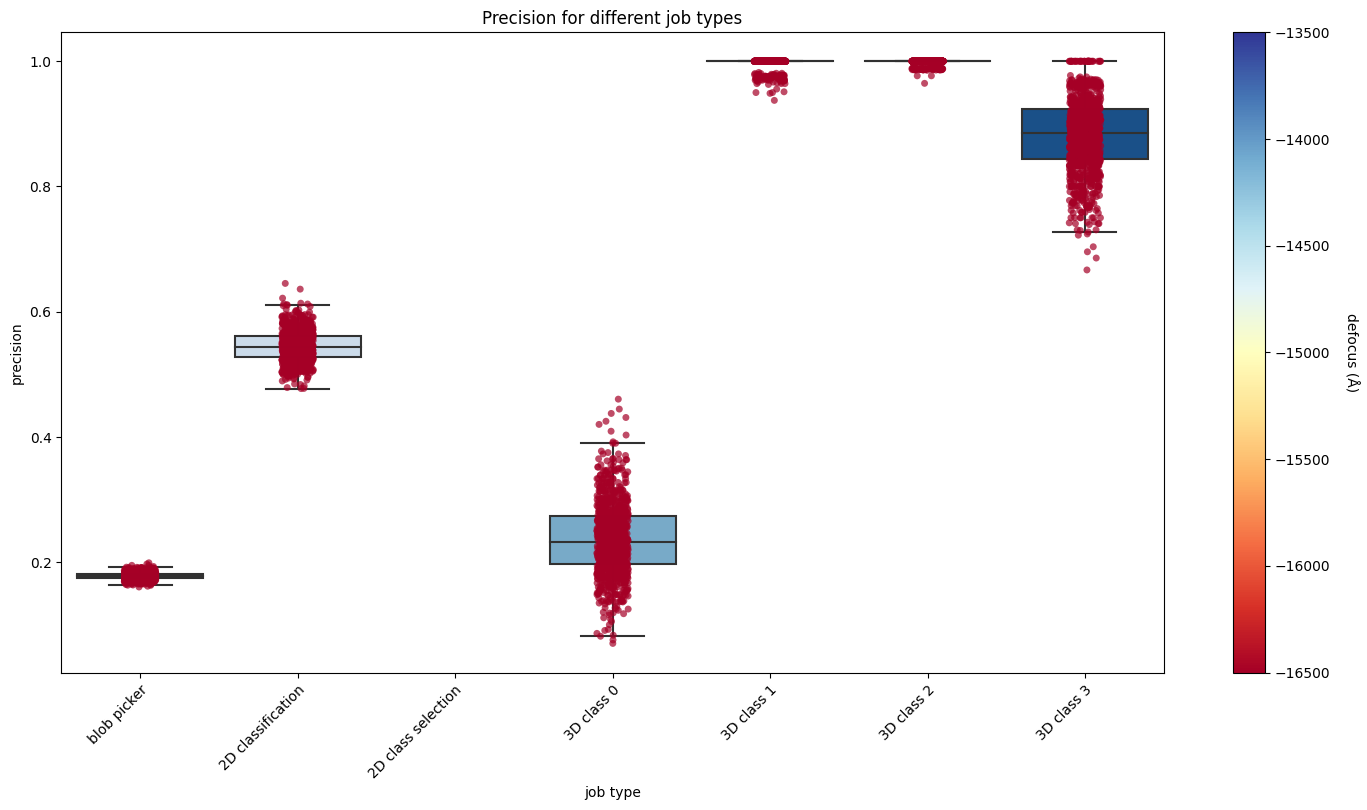

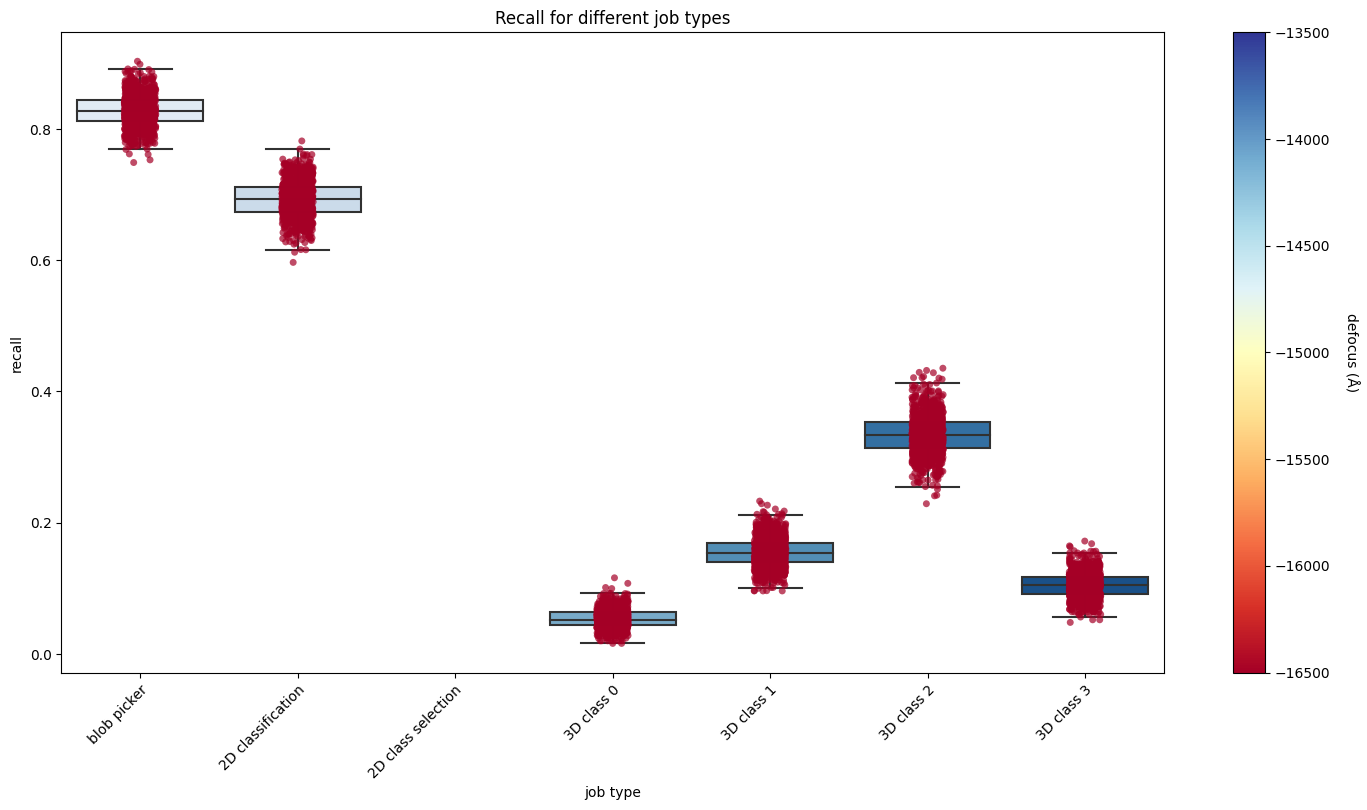

In [8]:
### plot boxplot for precision and recall
jobtypes = {
    "data/20230531_Sobhan_simulated/cryoSPARC/picked_particles.cs": "blob picker",
    "data/20230531_Sobhan_simulated/cryoSPARC/J584_050_particles.cs": "2D classification",
    "data/20230531_Sobhan_simulated/cryoSPARC/particles_selected.cs": "2D class selection",
    "data/20230531_Sobhan_simulated/cryoSPARC/J586_class_00_final_particles.cs": "3D class 0",
    "data/20230531_Sobhan_simulated/cryoSPARC/J586_class_01_final_particles.cs": "3D class 1",
    "data/20230531_Sobhan_simulated/cryoSPARC/J586_class_02_final_particles.cs": "3D class 2",
    "data/20230531_Sobhan_simulated/cryoSPARC/J586_class_03_final_particles.cs": "3D class 3",
}

order = []
for r in meta_files:
    if type(r) == str:
        order.append(r)
    else:
        order.append(r[0])    
fig, ax = plot_precision(df_precision, jobtypes, order)
fig.set_size_inches([15,10])

fig.savefig("precision.png", dpi=600, bbox_inches="tight")
fig.savefig("precision.pdf", bbox_inches="tight")

fig, ax = plot_recall(df_precision, jobtypes, order)
fig.set_size_inches([15,10])

fig.savefig("recall.png", dpi=600, bbox_inches="tight")
fig.savefig("recall.pdf", bbox_inches="tight")


In [ ]:
### alternatively, plot the precision and recall in the same plot
fig, ax = plot_precision_and_recall(df_precision, jobtypes)


In [ ]:
### plot f1-score
fig, ax = plot_f1_score(df_precision, jobtypes)
fig.set_size_inches(10,10)


In [ ]:
### plot the picked particles, now with the TP and FP marked in green and red
ugraph_index = 3 # which micrograph to plot
metadata_index = 4 # which metadata file to plot

fig, ax = label_micrograph_picked(df_picked, meta_files[meta_index], ugraph_index, config_dir, box_width=48, box_height=48, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)

In [ ]:
### plot the distribution of the particles in the ugraphs in x, y, and z directions
metadata_index = 0 # which metadata file to plot
bin_width = [100, 100, 10] # bin width for x, y, z
axis = ["x", "y", "z"]

metadata_filename = meta_files[metadata_index]
for a, bnwdth in zip(axis, bin_width):
    fig, ax = plot_boundary_investigation(df_truth, df_picked, metadata_filename, bnwdth, axis=a)

In [ ]:
df_overlap = analysis.compute_overlap(df_picked, df_truth, verbose=verbose)
df_overlap.head()

In [ ]:
### plot the overlap between the picked and truth particles
metadata_index = 0 # which metadata file to plot. If None, all metadata files are plotted

metadata_filename = meta_files[metadata_index]
fig, ax = plot_overlap_investigation(df_overlap, None, jobtypes=jobtypes)
ax.legend().set_visible(False)
ax.set_xlim((0, 50))
fig.tight_layout()


data/20230531_Sobhan_simulated/cryoSPARC/J586_class_03_final_particles.cs


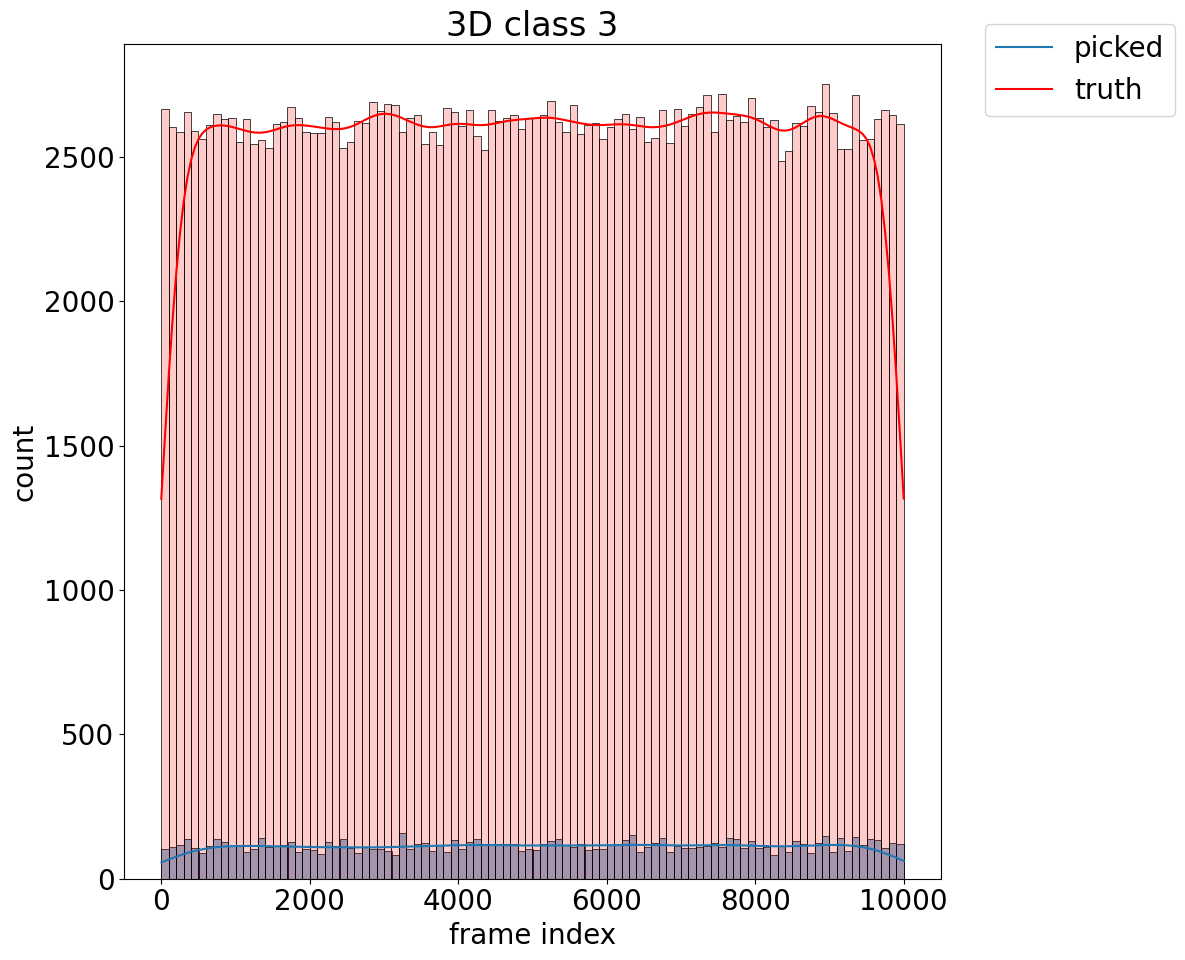

In [16]:
### plot the distribution of trajectory frames in a metadata file
metadata_index = 6 # which metadata file to plot

metadata_filename = meta_files[metadata_index]
if isinstance(metadata_filename, list):
    metadata_filename = metadata_filename[0]
print(metadata_filename)

fig, ax = plot_frame_distribution(df_picked, metadata_filename, df_truth, particle_diameter, jobtypes)
fig.set_size_inches(10,10)
fig.savefig("frame_distribution.png", dpi=600, bbox_inches="tight")
fig.savefig("frame_distribution.pdf", bbox_inches="tight")


### 2D classification

In [ ]:
### plot the precision per class
metadata_index = 5 # which metadata file to plot. Must have a class2D column

metadata_filename = meta_files[metadata_index]
if isinstance(metadata_filename, list):
    metadata_filename = metadata_filename[0]

fig, ax = plot_2Dclass_precision(df_picked, metadata_filename, jobtypes)


In [ ]:
### plot the distribution of frames over the 2D classes
metadata_index = 12 # which metadata file to plot. Must have a class2D column

metadata_filename = meta_files[metadata_index]
if isinstance(metadata_filename, list):
    metadata_filename = metadata_filename[0]

fig, ax = plot_2Dclasses_frames(df_picked, metadata_filename, binfactor=100)

fig.savefig("2Dclass_frames.png", dpi=600, bbox_inches="tight")	
fig.savefig("2Dclass_frames.pdf", bbox_inches="tight")

### 3D alignment

data/20230531_Sobhan_simulated/cryoSPARC/J586_class_03_final_particles.cs


/home/mjoosten1/projects/roodmus/src/roodmus/analysis/plot_alignment.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_picked_grouped["euler_phi"] = df_picked_grouped["euler_phi"].astype(
/home/mjoosten1/projects/roodmus/src/roodmus/analysis/plot_alignment.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_picked_grouped["euler_theta"] = -(
/home/mjoosten1/projects/roodmus/src/roodmus/analysis/plot_alignment.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

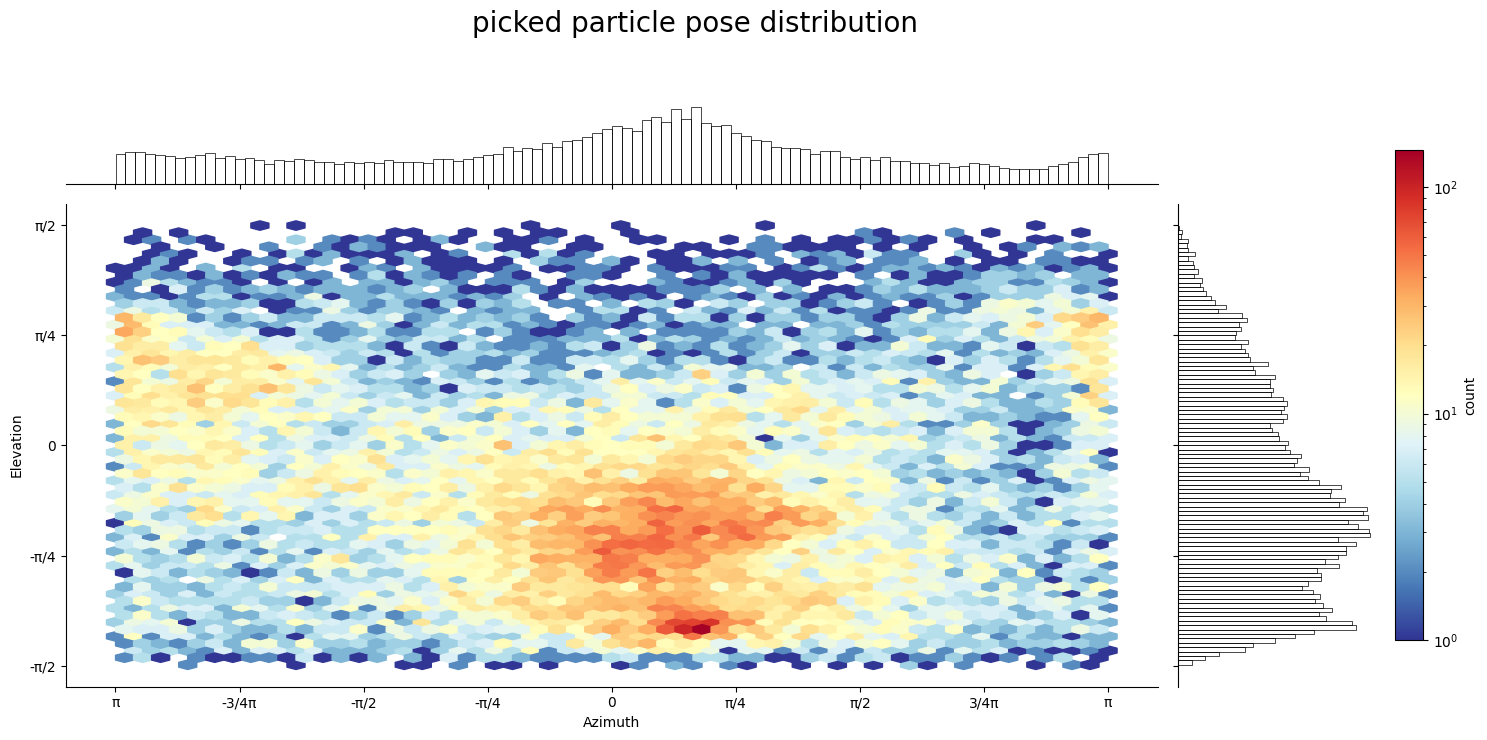

In [12]:
### plot the distribution of particle poses in the picked and truth particles
meta_index = 6

metadata_filename = meta_files[meta_index]
if isinstance(metadata_filename, list):
    metadata_filename = metadata_filename[0]
print(metadata_filename)

grid, vmin, vmax = plot_picked_pose_distribution(df_picked, metadata_filename)
grid.fig.set_size_inches(14, 7)
grid.fig.tight_layout()
grid.fig.savefig("picked_pose_distribution.png", dpi=600, bbox_inches="tight")
grid.fig.savefig("picked_pose_distribution.pdf", bbox_inches="tight")

# grid = plot_true_pose_distribution(df_truth, vmin, vmax)
# grid.fig.set_size_inches(14, 7)
# grid.fig.tight_layout()
# grid.fig.savefig("true_pose_distribution.png", dpi=600, bbox_inches="tight")
# grid.fig.savefig("true_pose_distribution.pdf", bbox_inches="tight")


# Miscelaneous things

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from emmer.pdb.convert.convert_pdb_to_map import convert_pdb_to_map
from emmer.ndimage.filter.low_pass_filter import low_pass_filter
from emmer.ndimage.compute_real_space_correlation import compute_real_space_correlation
import os
import gemmi
from tqdm import tqdm 


In [ ]:
df_grouped = df_picked.groupby("metadata_filename").get_group(meta_files[-1])
print(len(df_grouped))
df_grouped.head()

In [ ]:
# adding columns for latent space coordinates from a heterogenous reconstruction
latent_file = "data/6xm5_steered_Roodmus_2/cryoSPARC/J526_latents_019446.cs"
# latent_file = "data/c3c3b/cryoSPARC/J567_latents_013024.cs"
# latent_file = "data/c3c3b/cryoSPARC/J574_latents_013024.cs"
latents = np.load(latent_file)
print(latents.dtype.names)
print(f"number of latents: {len(latents)}")

for name in latents.dtype.names:
    df_grouped[name] = latents[name]

# adding the angle
angle = pd.read_csv("data/6xm5_steered_Roodmus_1/trj/angles.csv")

for i, row in df_picked.iterrows():
    pdb_index = row["closest_pdb_index"]
    if pdb_index >= 0:
        df_picked.at[i, "angle"] = angle.iloc[int(pdb_index)]["angle"]

df_grouped.head()

In [ ]:
dt = 5*2 / 1000 # ps per frame
angle["time"] = angle["frame_id"] * dt

# plot the angles
fig, ax = plt.subplots(figsize=(7, 3.5))
plt.rcParams.update({'font.size': 12})
sns.lineplot(data=angle,
             x="time",
             y="angle",
             ax=ax,
             color="black",
             alpha=0.5)
# plot markers over the line every 100 frames
sns.scatterplot(data=angle[::100],
                x="time",
                y="angle",
                hue="angle",
                ax=ax,
                palette="RdYlBu_r",
                legend=False,
                s=30,
                alpha=1)
ax.set_xlabel("time [ps]")
ax.set_ylabel("angle")
fig.tight_layout()

fig.savefig("angle.eps", bbox_inches="tight")
fig.savefig("angle.png", dpi=600, bbox_inches="tight")

In [ ]:
# plot the latent space
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=df_grouped, x="components_mode_0/value", ax=ax, bins=100)
ax.set_xlabel("latent z")

# grid = sns.jointplot(
#     data=df_grouped,
#     x="components_mode_0/value",
#     y="components_mode_1/value",
#     kind="hex",
#     xlim=(-1.5, 1.5),
#     ylim=(-1.5, 1.5),
#     height=10,
#     marginal_kws=dict(bins=100, fill=False),
#     color="k",
#     palette="RdBu",
#     bins="log",
# )
# grid.set_axis_labels("latent z", "latent y", fontsize=20)


# grid.fig.savefig("latent_space.png", dpi=600, bbox_inches="tight")
# grid.fig.savefig("latent_space.pdf", bbox_inches="tight")

In [ ]:
# fig, ax = plt.subplots(1,1, figsize=(15, 10))
# # sns.scatterplot(data=df_picked, x="components_mode_0/value", y="angle", ax=ax)
# sns.kdeplot(data=df_picked, x="components_mode_0/value", y="angle", ax=ax, levels=10, color="black")

# fig.savefig("latent_space_angle_kde.png", dpi=600, bbox_inches="tight")
# fig.savefig("latent_space_angle_kde.pdf", bbox_inches="tight")

grid = sns.jointplot(data=df_picked, x="components_mode_0/value", y="angle", kind="hex", gridsize=65, cmap="RdBu_r", bins="log", marginal_kws=dict(bins=100, fill=False), color="k")
grid.ax_joint.set_xlabel("latent z")

fig.savefig("latent_space_angle_hexbin.png", dpi=600, bbox_inches="tight")
fig.savefig("latent_space_angle_hexbin.pdf", bbox_inches="tight")


In [ ]:
# for each map in the vseries, correlate against the pdb files in the trajectory

# vseries_dir = "data/6xm5_steered_Roodmus_2/cryosparc_P51_J527_series_000/"
# ensemble_filename = "data/6xm5_steered_Roodmus_2/cryosparc_P51_J527_series_000/small_ensemble_fit_to_vseries.pdb"
# mask_filename = "data/6xm5_steered_Roodmus_2/cryosparc_P51_J527_series_000/ensemble_mask.mrc"
# latent_coordinates = np.linspace(-1.0827, 0.5707, 41)

# vseries_dir = "data/c3c3b/cryosparc_P51_J572_series_000/"
# ensemble_filename = "data/c3c3b/trj/c3_to_c3b_morph_attempt_2_ensemble_fit_to_J572_series_0.pdb"
# mask_filename = "data/c3c3b/cryosparc_P51_J572_series_000/J572_series_0_mask.mrc"
# latent_coordinates = np.linspace(-0.93354666, 0.80533326, 41)

vseries_dir = "data/c3c3b/cryosparc_P51_J575_series_000/"
ensemble_filename = "data/c3c3b/trj/c3_to_c3b_morph_attempt_2_ensemble_fit_to_J575_series_0.pdb"
mask_filename = "data/c3c3b/cryosparc_P51_J575_series_000/J575_series_0_mask.mrc"
latent_coordinates = np.linspace(-0.98666668, 1.15733337, 41)


ensemble_gemmi = gemmi.read_structure(ensemble_filename)
mask = np.array(gemmi.read_ccp4_map(mask_filename).grid)
# threshold the mask at 2*sigma
threshold = 2 * np.std(mask)
print(f"threshold: {threshold}")
mask[mask < threshold] = 0
mask[mask >= threshold] = 1

resolution = 4
results = {
    "frame_index": [],
    "model_index": [],
    "latent_coordinate": [],
    "rscc": [],
    "rscc_T": [],
}
progressbar = tqdm(total=len(os.listdir(vseries_dir)))
for filename in os.listdir(vseries_dir):
    if filename.endswith(".mrc") and "mask" not in filename:
        mrc_file = os.path.join(vseries_dir, filename)
        mrc = gemmi.read_ccp4_map(mrc_file)
        vsize = mrc.grid.spacing[0]
        vseries_index = int(filename.split(".")[0].split("_")[-1])

        for model_index, model in enumerate(ensemble_gemmi):
            tmp_structure = gemmi.Structure()
            tmp_structure.add_model(model)
            map_from_model_unfiltered = convert_pdb_to_map(
                input_pdb=tmp_structure,
                unitcell=mrc.grid.unit_cell,
                size=mrc.grid.shape,
                return_grid=False,
            )
            map_from_model_zyx = low_pass_filter(
                map_from_model_unfiltered, resolution, vsize
            )
            map_from_model = np.rot90(
                np.flip(map_from_model_zyx, axis=0), axes=(2, 0)
            )

            # apply mask to both maps
            map_from_model = np.array(map_from_model) * mask
            # map_from_model_zyx *= mask
            targetmap_data = np.array(mrc.grid) * mask


            rscc = compute_real_space_correlation(
                map_from_model,
                targetmap_data,
            )
            rscc_T = compute_real_space_correlation(
                map_from_model_zyx,
                targetmap_data,
            )
                

            frame_index = model_index* 200
            # print(f"{frame_index}: {rscc}")

            results["frame_index"].append(frame_index)
            results["model_index"].append(model_index)
            results["latent_coordinate"].append(latent_coordinates[vseries_index])
            results["rscc"].append(rscc)
            results["rscc_T"].append(rscc_T)
            progressbar.set_postfix(rscc=rscc)

        # break

    progressbar.update(1)
    progressbar.set_description(f"frame {filename}")


progressbar.close()



In [ ]:
# transform the output into a 2D array
rscc = np.zeros((len(latent_coordinates), len(ensemble_gemmi)))
for i, frame_index in enumerate(results["frame_index"]):
    latent_index = np.where(latent_coordinates == results["latent_coordinate"][i])[0][0]
    rscc[latent_index, frame_index//200] = results["rscc"][i]


min_rscc = np.min(rscc)
max_rscc = np.max(rscc)
# plot the results
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(rscc, ax=ax, cmap="RdBu_r", vmin=min_rscc, vmax=max_rscc)
ax.set_xlabel("frame index")
ax.set_ylabel("latent coordinate")

fig.savefig("rscc.png", dpi=600, bbox_inches="tight")
fig.savefig("rscc.pdf", bbox_inches="tight")
# save the results
np.save("rscc.npy", rscc)



In [ ]:
map_from_model_unfiltered = convert_pdb_to_map(
    input_pdb=tmp_structure,
    unitcell=mrc.grid.unit_cell,
    size=mrc.grid.shape,
    return_grid=False,
)
map_from_model_zyx = low_pass_filter(
    map_from_model_unfiltered, resolution, vsize
)
map_from_model = np.rot90(
    np.flip(map_from_model_zyx, axis=0), axes=(2, 0)
)
# map_from_model = map_from_model.T

plot_axis =1

fig, ax = plt.subplots()
ax.imshow(np.mean(map_from_model, axis=plot_axis))
fig, ax = plt.subplots()
ax.imshow(np.mean(np.array(mrc.grid), axis=plot_axis))
fig, ax = plt.subplots()
ax.imshow(np.mean(mask, axis=plot_axis))

fig, ax = plt.subplots()
ax.imshow(np.mean(map_from_model*mask, axis=plot_axis))
fig, ax = plt.subplots()
ax.imshow(np.mean(np.array(mrc.grid)*mask, axis=plot_axis))

rscc = compute_real_space_correlation(
    map_from_model*mask,
    np.array(mrc.grid)*mask,
)

print(mrc_file)
print(model_index)
print(rscc)


In [ ]:
df = pd.DataFrame(results)
df